In [27]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()
# we do also connect to the telscope for a status - position
await lvm.sci.pwi.start()
await lvm.sci.pwi.status()

await lvm.sci.foc.start()
await lvm.sci.foc.moveAbsolute(42)

{'Reachable': True,
 'AtHome': False,
 'Moving': False,
 'PositionSwitchStatus': 254,
 'Position': 42.0,
 'DeviceEncoder': {'Position': -166700.0, 'Unit': 'STEPS'},
 'Velocity': 0.0,
 'AtLimit': False}

east: /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000190.fits, west: /data/lvm/sci/agcam/west/20220728/lvm.sci.agcam.west_00000190.fits


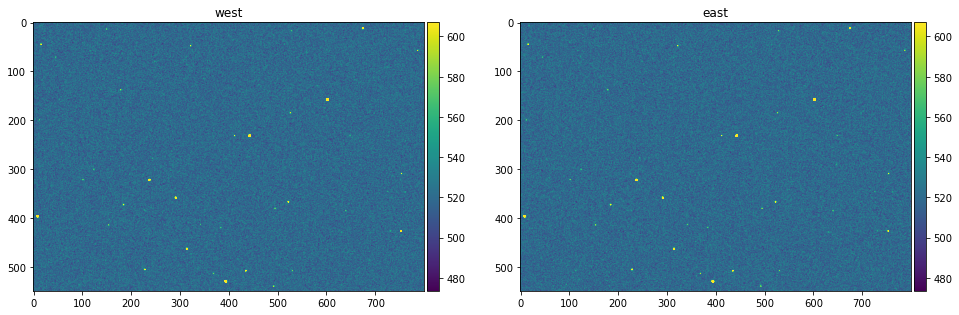

east: /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000191.fits, west: /data/lvm/sci/agcam/west/20220728/lvm.sci.agcam.west_00000191.fits


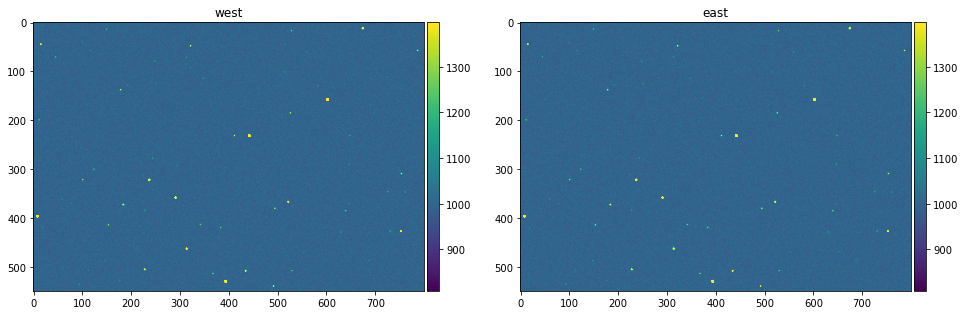

In [28]:
%matplotlib inline
from plotimg import plot_images, fits

for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

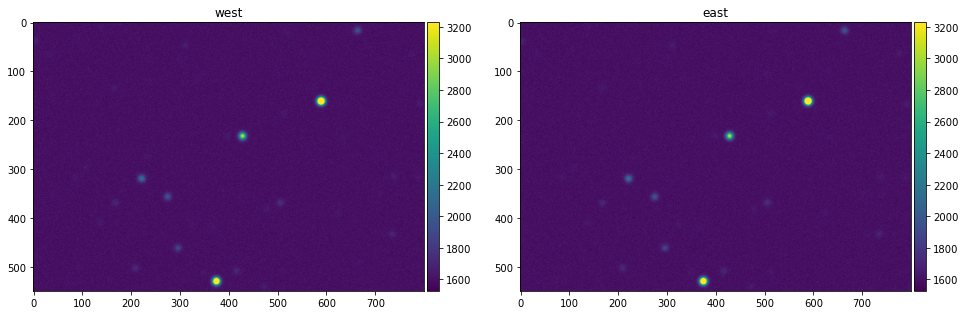

[INFO]: 32.0 /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000223.fits 16


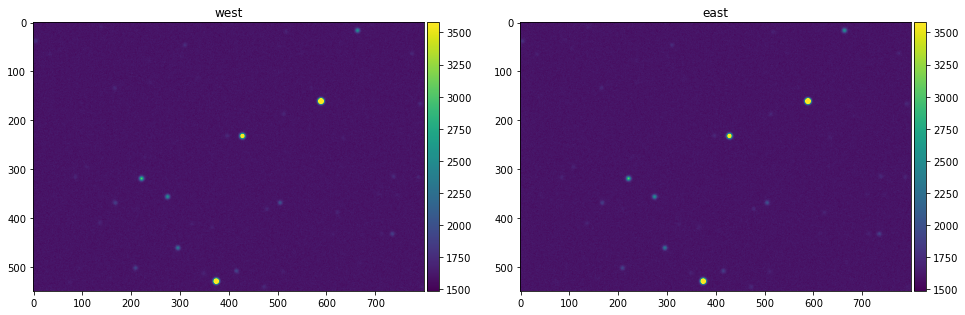

[INFO]: 36.0 /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000224.fits 30


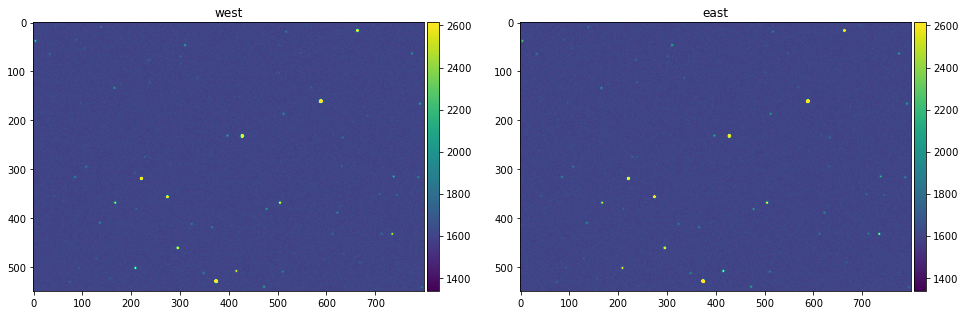

[INFO]: 40.0 /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000225.fits 63


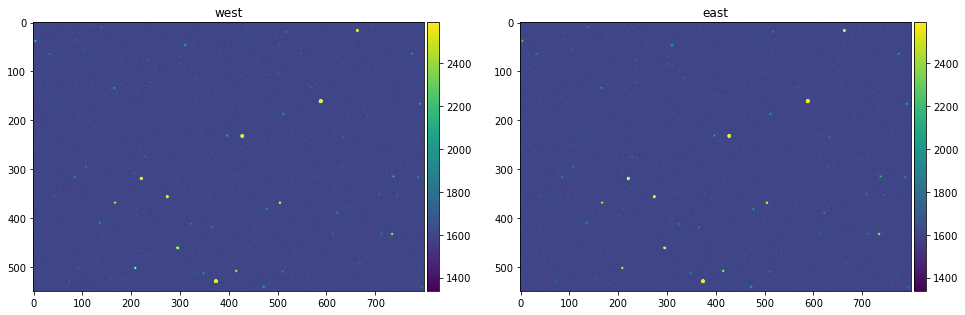

[INFO]: 44.0 /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000226.fits 73


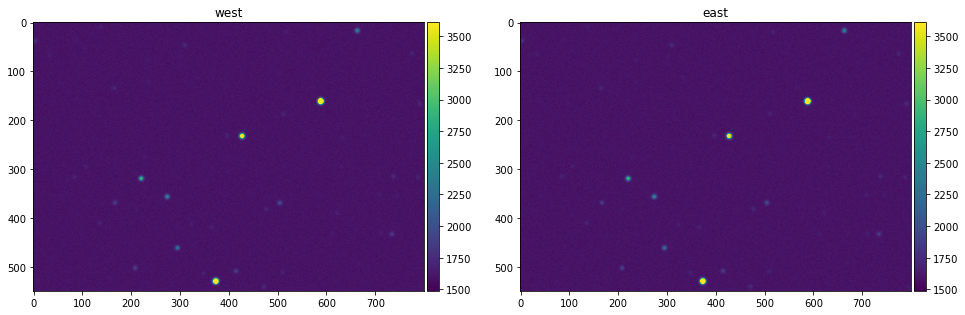

[INFO]: 48.0 /data/lvm/sci/agcam/east/20220728/lvm.sci.agcam.east_00000227.fits 31


focus: 41.40159847164778, err: 2.468855037175765


In [36]:
%matplotlib inline
from plotimg import plot_images, fits

from lvmtipo.actors import lvm
from lvmagp.focus import Focus
from logging import DEBUG, INFO

telsubsys = await lvm.from_string("sci")
focus = Focus(telsubsys, level = DEBUG)

await lvm.sci.pwi.status()

def img_cb(img_e, img_w):
   plot_images(img_e.data, img_w.data)

f_cal, f_err = await focus.fine(guess=44, count=2, step=4, exposure_time=10, callback=img_cb)

print(f"focus: {f_cal}, err: {f_err}")


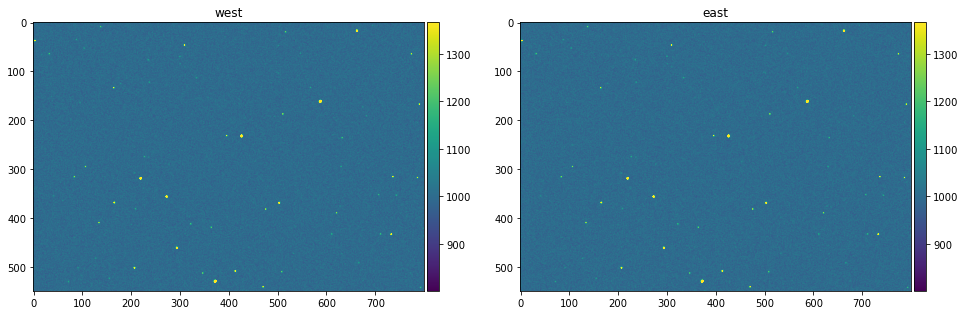

In [37]:
from plotimg import plot_images, fits

await lvm.sci.foc.moveAbsolute(f_cal)
ef, wf = (await lvm.sci.agc.expose(5)).flatten().unpack("east.filename", "west.filename") 
plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))